In [1]:
import os
from google.analytics.data_v1beta import BetaAnalyticsDataClient
from google.analytics.data_v1beta.types import (
    DateRange,
    Dimension,
    Metric,
    RunReportRequest,
    Filter,
    FilterExpression
)
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
def most_viewed_pages_report(limit=100000,offset=0,duration=30):
    """Runs a simple report on a Google Analytics 4 property."""
    # TODO(developer): Uncomment this variable and replace with your
    #  Google Analytics 4 property ID before running the sample.
    # property_id = "YOUR-GA4-PROPERTY-ID"
    os.environ['GOOGLE_APPLICATION_CREDENTIALS']='google-analytics-credentials.json'
    property_id="353919955"
    # Using a default constructor instructs the client to use the credentials
    # specified in GOOGLE_APPLICATION_CREDENTIALS environment variable.
    client = BetaAnalyticsDataClient()
    today=datetime.date.today()
    end_date=today-datetime.timedelta(days=1)  
    start_date=end_date-datetime.timedelta(days=duration)
    request = RunReportRequest(
        property=f"properties/{property_id}",
        dimensions=[Dimension(name="fullPageUrl")],
        metrics=[
            Metric(name="totalUsers"),
            Metric(name="activeUsers"),
            Metric(name='newUsers'),
            Metric(name='bounceRate'),
            Metric(name='keyEvents'),
            Metric(name='userEngagementDuration'),
        ],
        date_ranges=[DateRange(start_date=start_date.strftime('%Y-%m-%d'), end_date=end_date.strftime('%Y-%m-%d'))],
        limit=limit,
        offset=offset,
    )
    response = client.run_report(request)
    return response

In [8]:
def page_views_report(url=''):
    """Runs a simple report on a Google Analytics 4 property."""
    # TODO(developer): Uncomment this variable and replace with your
    #  Google Analytics 4 property ID before running the sample.
    # property_id = "YOUR-GA4-PROPERTY-ID"
    os.environ['GOOGLE_APPLICATION_CREDENTIALS']='google-analytics-credentials.json'
    property_id="353919955"
    # Using a default constructor instructs the client to use the credentials
    # specified in GOOGLE_APPLICATION_CREDENTIALS environment variable.
    client = BetaAnalyticsDataClient()
    if url=='':
        url_filter=None
    else:
        url_filter=FilterExpression(
            filter=Filter(
                field_name='fullPageUrl',
                string_filter=Filter.StringFilter(value=url)
            )
        )
    request = RunReportRequest(
        property=f"properties/{property_id}",
        dimensions=[Dimension(name="date")],
        metrics=[
            Metric(name="totalUsers"),
            Metric(name="activeUsers"),
            Metric(name='newUsers'),
            Metric(name='bounceRate'),
            Metric(name='keyEvents'),
            Metric(name='userEngagementDuration'),
        ],
        date_ranges=[DateRange(start_date="2023-02-16", end_date="yesterday")],
        dimension_filter=url_filter,
    )
    response = client.run_report(request)
    return response
    



In [42]:
def page_view_report_to_df(response):
    columns=[]
    for dimensionHeader in response.dimension_headers:
        columns.append(dimensionHeader.name)
    for metricHeader in response.metric_headers:
        columns.append(metricHeader.name)
    data=[]
    for row in response.rows:
        row_value=[]
        for dimension_value in row.dimension_values:
            row_value.append(dimension_value.value)
        for metric_value in row.metric_values:
            row_value.append(metric_value.value)
        data.append(row_value)
    df=pd.DataFrame(data,columns=columns)
    df['date']=pd.to_datetime(df['date'])
    df.set_index('date',inplace=True)
    df.sort_index(inplace=True)
    df['totalUsers']=df['totalUsers'].astype(int)
    df['activeUsers']=df['activeUsers'].astype(int)
    df['newUsers']=df['newUsers'].astype(int)
    df['keyEvents']=df['keyEvents'].astype(int)
    df['bounceRate']=df['bounceRate'].astype(float)
    df['userEngagementDuration']=df['userEngagementDuration'].astype(int)
    return df


In [11]:
response=page_views_report('')
df=page_view_report_to_df(response)

,totalUsers,activeUsers,newUsers,bounceRate,keyEvents,userEngagementDuration
date,,,,,,
2023-02-16,2624,2616,2589,0.370641,50,251172
2023-02-17,3030,2904,2718,0.418156,55,295099
2023-02-18,2757,2631,2440,0.425461,38,294853
2023-02-19,2847,2692,2458,0.424978,73,301052
2023-02-20,3276,3109,2797,0.407522,53,348841
...,...,...,...,...,...,...
2024-05-13,3057,2765,2333,0.487737,47,268625
2024-05-14,3107,2835,2351,0.501597,69,251556
2024-05-15,3071,2764,2281,0.498491,52,240740


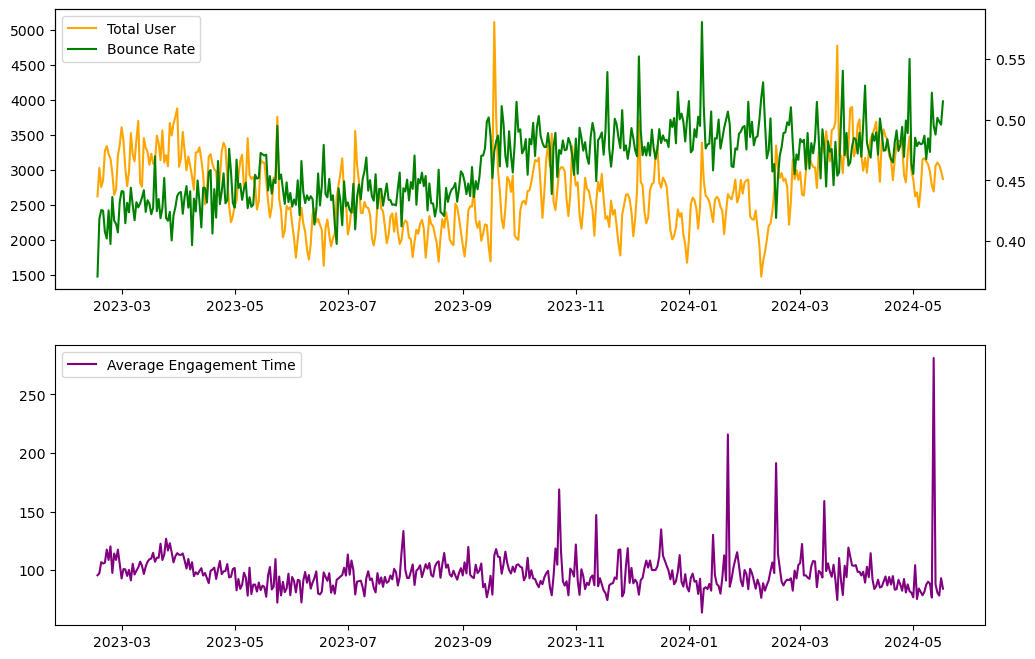

In [39]:
fig,(ax1,ax2)=plt.subplots(ncols=1,nrows=2,figsize=(12,8))
ax3=ax1.twinx()
line1=ax1.plot(df['totalUsers'],c='orange',label='Total User')
line2=ax3.plot(df['bounceRate'],label='Bounce Rate',c='green')
line3=ax2.plot(df['userEngagementDuration']/df['totalUsers'],c='purple',label='Average Engagement Time')
lines=line1+line2
labels=[l.get_label() for l in lines]
ax1.legend(lines,labels,loc='upper left')
ax2.legend()
plt.show()

In [48]:
def most_viewed_pages_report_to_df(response):
    columns=[]
    for dimensionHeader in page_response.dimension_headers:
        columns.append(dimensionHeader.name)
    for metricHeader in page_response.metric_headers:
        columns.append(metricHeader.name)
    data=[]
    for row in page_response.rows:
        row_value=[]
        for dimension_value in row.dimension_values:
            row_value.append(dimension_value.value)
        for metric_value in row.metric_values:
            row_value.append(metric_value.value)
        data.append(row_value)
    df=pd.DataFrame(data,columns=columns)
    df['totalUsers']=df['totalUsers'].astype(int)
    df['activeUsers']=df['activeUsers'].astype(int)
    df['newUsers']=df['newUsers'].astype(int)
    df['keyEvents']=df['keyEvents'].astype(int)
    df['bounceRate']=df['bounceRate'].astype(float)
    df['userEngagementDuration']=df['userEngagementDuration'].astype(int)
    return df

In [49]:
page_response=most_viewed_pages_report(duration=60)
df_pages=most_viewed_pages_report_to_df(response)

In [50]:
df_pages.head(10)

,fullPageUrl,totalUsers,activeUsers,newUsers,bounceRate,keyEvents,userEngagementDuration
0,www.forwardpathway.com/ranking,30585,29965,23696,0.426424,742,2962351
1,www.forwardpathway.com/worldranking,16214,15948,12988,0.432389,420,2402202
2,www.forwardpathway.com/,9246,8985,6553,0.322906,217,179072
3,www.forwardpathway.com/business-school-ranking,2495,2442,1398,0.365791,41,239289
4,www.forwardpathway.com/computer-science-ranking,2276,2222,1190,0.310961,55,224451
5,www.forwardpathway.com/engineering-school-ranking,2185,2143,1086,0.325714,77,259703
6,www.forwardpathway.com/8413,1581,1564,240,0.176080,20,116162
7,www.forwardpathway.com/78712,1418,1390,1338,0.519802,2,45690
8,www.forwardpathway.com/9226,1377,1365,369,0.202899,16,108570
9,www.forwardpathway.com/8484,1233,1224,118,0.127420,13,70441


In [43]:
response=page_views_report('www.forwardpathway.com/ranking')
df_ranking=page_view_report_to_df(response)

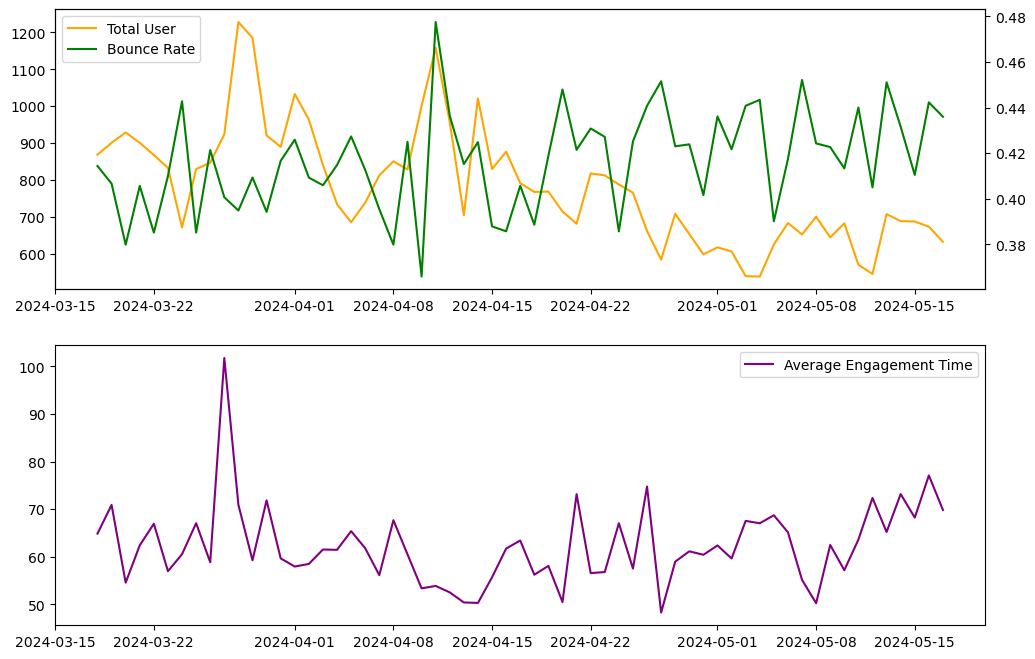

In [47]:
fig,(ax1,ax2)=plt.subplots(ncols=1,nrows=2,figsize=(12,8))
ax3=ax1.twinx()
line1=ax1.plot(df_ranking['totalUsers'],c='orange',label='Total User')
line2=ax3.plot(df_ranking['bounceRate'],label='Bounce Rate',c='green')
line3=ax2.plot(df_ranking['userEngagementDuration']/df_ranking['totalUsers'],c='purple',label='Average Engagement Time')
lines=line1+line2
labels=[l.get_label() for l in lines]
ax1.legend(lines,labels,loc='upper left')
ax2.legend()
plt.show()